In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline
%config Completer.use_jedi = False

***Première phase: exploration/nettoyage des données***

In [22]:
# Chargement des données
raw_data = pd.read_csv('data/house_data.csv')

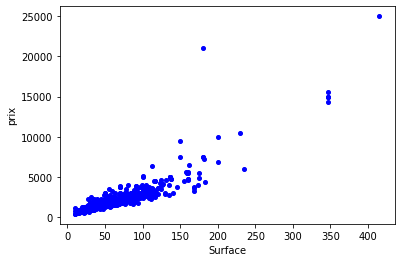

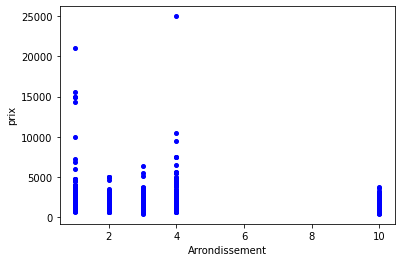

In [43]:
plt.plot(raw_data['surface'],raw_data['price'],'bo', markersize=4)
plt.xlabel('Surface')
plt.ylabel('prix')
plt.show()

plt.plot(raw_data['arrondissement'],raw_data['price'],'bo', markersize=4)
plt.xlabel('Arrondissement')
plt.ylabel('prix')
plt.show()


In [44]:
# Résumé des données bruites
raw_data.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [46]:
# il y a quelque valeurs manquates, on supprime ces lignes
data_na = raw_data.dropna()

# on supprime les outlier
data = data_na[data_na['price']<8_000]

# On reindexe
data = data.reset_index(drop=True)

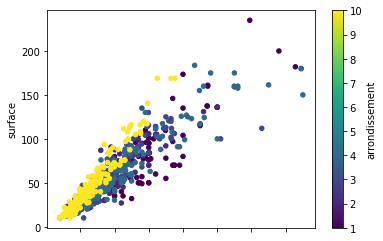

In [68]:
# Puis on affiche les données netoyées
d = data.plot.scatter("price", "surface", c="arrondissement", 
                  colormap='viridis')

Il y a clairement un problème d'***hétéroscédasticité***, mais ce n'est pas le sujet de l'activité. 

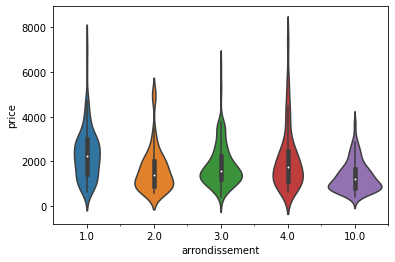

In [61]:
# On affiche maintenant la variable prédite (loyer) en fonction de l'arrondissement

# sns.violinplot est similaire a la boite a moustache mais ici pour différent arrondissement
# On affiche donc la boite a moustache groupé par arrondissement
ax1 = sns.violinplot(x=data['arrondissement'], y=data['price'])

***La répatition des prix sembles a peut près la même avec moins de loyers élévés (+volatiles) dans le 10ème. Si l'on considère que l'on a des échantillons réprésentatif. Il faut de toute manière croiser avec la surface pour avoir une vision plus claire***

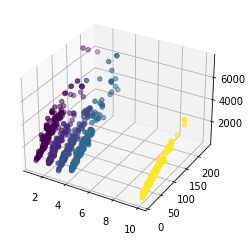

In [84]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')

fig.scatter(data['arrondissement'], data['surface'], data['price'],
           c=data['arrondissement'],
           cmap="viridis")
plt.show()

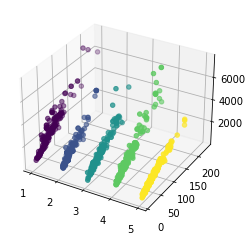

In [88]:
#Pour faciliter la visualisation on remplace 10 par 5
tmp_arr = data['arrondissement'][:]
tmp_arr[tmp_arr==10] = 5
fig = plt.figure().gca(projection='3d')

fig.scatter(tmp_arr, data['surface'], data['price'],
           c=tmp_arr,
           cmap="viridis")
plt.show()

***On va effectuer une régression specifique sur chaque arrondissement, pour avoir plus de précision.***

***D'abord, séparation jeu de données d'entraînement / jeu de données test***


In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(data[['surface', 'arrondissement']], 
                                                data['price'],
                                               test_size = 0.3)

***Créons ensuite la baseline (Regretionlineaire), et calculons le R2 (la somme quadratique des résidus), comme valeur d'évaluation de notre regression.***

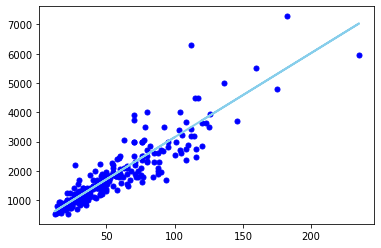

In [103]:
lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain)
baseline_predic = lr_baseline.predict(xtest[["surface"]])

plt.plot(xtest[['surface']], ytest, 'bo', markersize=5)
plt.plot(xtest[['surface']], baseline_predic, 
         color='skyblue',
        linewidth = 2)
plt.show()

Calcul du score

In [106]:
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(baseline_predic, ytest['price'])


KeyError: 'price'

In [59]:
ax1.minorticks_on?

Signature: ax1.minorticks_on()
Docstring:
Display minor ticks on the axes.

Displaying minor ticks may reduce performance; you may turn them off
using `minorticks_off()` if drawing speed is a problem.
File:      ~/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py
Type:      method


In [78]:
plt.scatter?

Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=<deprecated parameter>,
    edgecolors=None,
    *,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2-D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because tha